<a href="https://colab.research.google.com/github/LCaravaggio/AnalisisEconomico/blob/main/Ejercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import json

import requests
from requests.auth import HTTPBasicAuth
from matplotlib import pyplot as plt
import pandas as pd

import seaborn as sns

In [2]:
drive.mount('/content/drive', force_remount=True)
with open("/content/drive/My Drive/alphacast.json", 'r') as f:
    api_token= json.load(f)

Mounted at /content/drive


In [3]:
# Definir user key para la API
user_key = api_token["key"]

In [4]:
# EMAE
emae = requests.get('https://api.alphacast.io/datasets/5331/data?apiKey='+user_key+'&&$format=csv', auth=HTTPBasicAuth(user_key, ''))
open('emae.csv','wb').write(emae.content)
emae = pd.read_csv('emae.csv',delimiter = ',')

In [5]:
emae['Date'] = pd.to_datetime(emae['Date'])
emae.set_index('Date', inplace = True)
emae = emae[['Emae','Emae - current_prices_mom','Emae - current_prices_yoy','Emae - sa_orig','Emae - sa_orig - current_prices_mom','Emae - sa_orig - current_prices_yoy']]
emae.columns = ['EMAE', 'EMAE MoM','EMAE YoY','EMAE (sa)','EMAE (sa) MoM','EMAE (sa) YoY']
emae = emae.loc['2004-01-01':]

In [6]:
sns.set_theme(style='darkgrid')
def graficar(variable):
    fig = sns.lineplot(x=emae.index, y=variable)
    plt.title(variable.name)
    plt.xlabel("Año")
    plt.savefig('%s.png'%variable.name)
    return fig

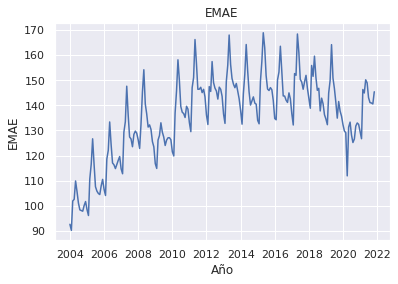

In [7]:
graficar(emae.EMAE)